In [1]:
import numpy as np
import nmrglue
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Important Acqus Parameters
AQ=0.8000000# Acquistion time (s)
SWH=2000 #Spectral Width [Hz]
SF=202.4765750 #Spectrometer frequency [Mhz]
SFO1=202.4751988 #Transmitter frequency [Mhz]
p0=-44.000
p1=0

In [3]:
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_13\1000_V6_NS4_2D_2ch\2")[1]
all_data.shape

(4, 1664)

In [4]:
array0, array1, array2, array3 = all_data
print(array0.shape)  # Output: (1664,)
print(array1.shape)  # Output: (1664,)
print(array2.shape)  # Output: (1664,)
#Row 4 is just a place holder for empty data

(1664,)
(1664,)
(1664,)


In [5]:
all_data=array2

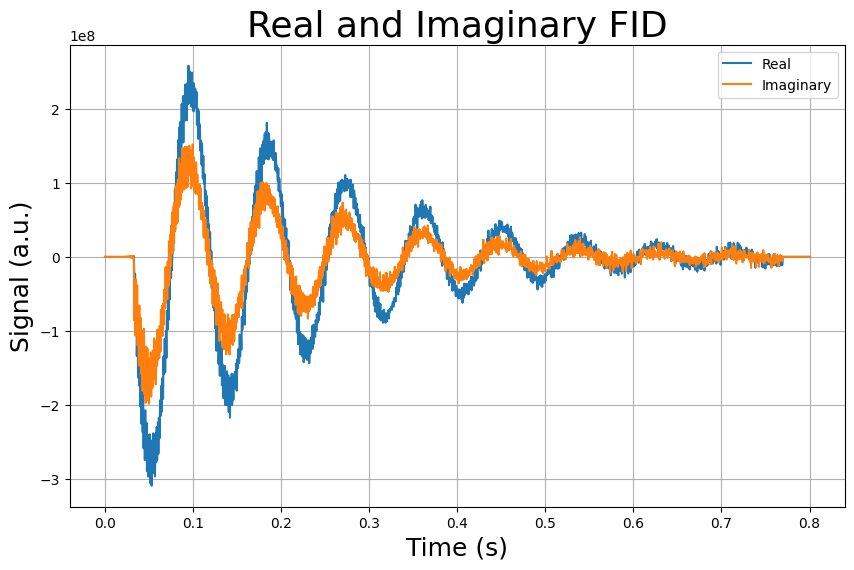

In [6]:
# Create a DataFrame with real, imaginary, and time values
time = np.linspace(0, AQ, len(all_data))
df = pd.DataFrame({
    "Time": time,
    "Real": all_data.real,
    "Imaginary": all_data.imag
})

# Plot Real and Imaginary FID on the same plot
plt.figure(figsize=(10, 6))
plt.plot(df["Time"], df["Real"], label="Real")
plt.plot(df["Time"], df["Imaginary"], label="Imaginary")
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Signal (a.u.)', fontsize=18)
plt.title('Real and Imaginary FID', fontsize=26)
plt.legend()
plt.grid(True)
plt.show()

## FT of Raw Data
###### nmrglue has two types of FT "rft" (real fourier transform) and "fft" (Fourier transform, NMR ordering of results)

## Next we will process data ourselves and try to figure out how Bruker auto-processes

###### Apply exponential apodiziation, and ls shift. (Zero filling seems unneccesary because of exponential apodization)

In [7]:
all_data=nmrglue.proc_base.ps(all_data, p0+90, p1) #Why is there an extra 90 here? Probably from ph31 convention?

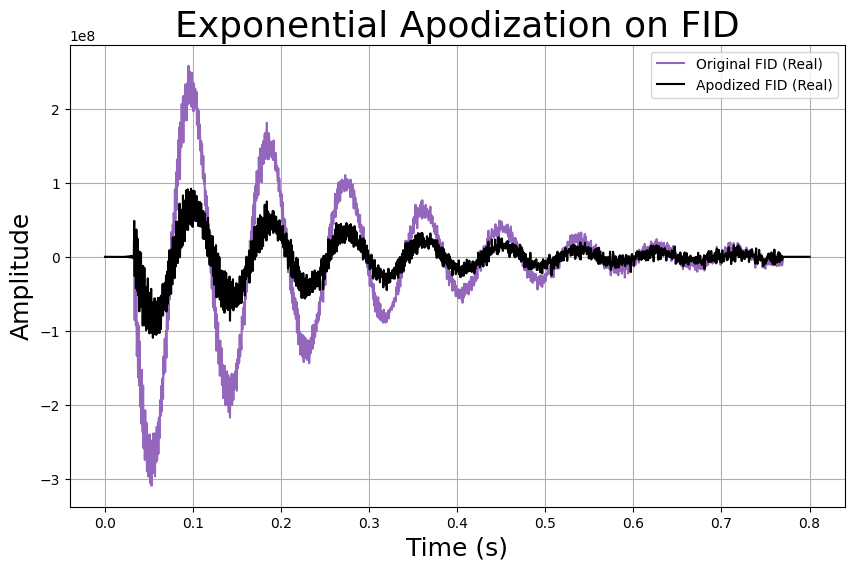

In [13]:
# Apply exponential apodization
#apodized_data = nmrglue.proc_base.em(all_data, .0004)
#*********this function can only take real part and not full complex part. Do we want to edit this way?

#*******TURNING THIS OFF FOR NOW
apodized_data = all_data
#*******

plt.figure(figsize=(10, 6))
plt.plot(df["Time"], df["Real"], label="Original FID (Real)", color="#9467bd")
plt.plot(df["Time"], all_data.real, label="Apodized FID (Real)", color="black")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)
plt.title("Exponential Apodization on FID", fontsize=26)
plt.legend()
plt.grid(True)
plt.show()

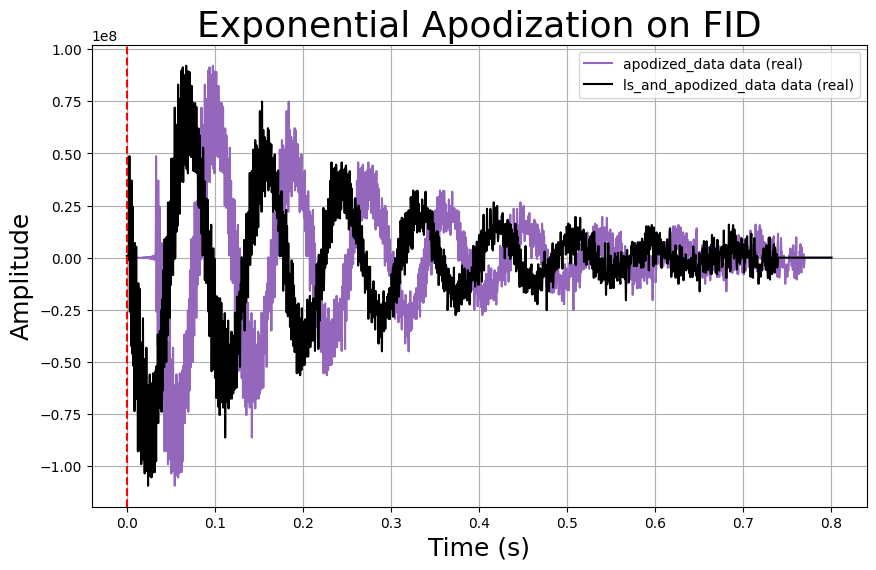

In [9]:
ls_and_apodized_data = nmrglue.proc_base.ls(apodized_data, 63)
# Plot the results
plt.figure(figsize=(10, 6))
time=np.linspace(0, AQ, len(all_data.real))
plt.plot(time, apodized_data.real, label="apodized_data data (real)", color="#9467bd")
plt.plot(time, ls_and_apodized_data.real, label="ls_and_apodized_data data (real)", color="black")
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)
plt.title("Exponential Apodization on FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-.01,.1)
plt.axvline(x=0, color='red', linestyle='--', label="x = 0")
plt.show()


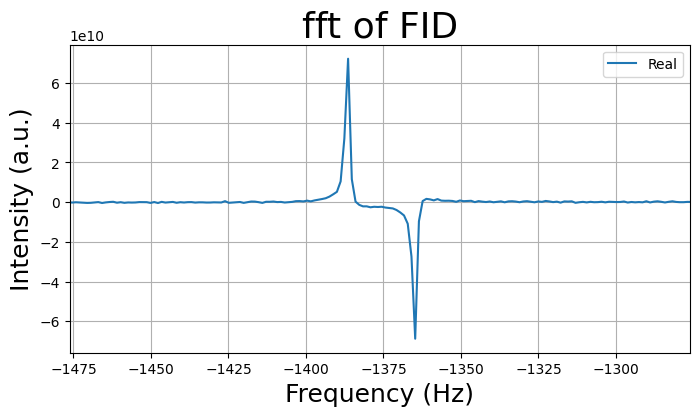

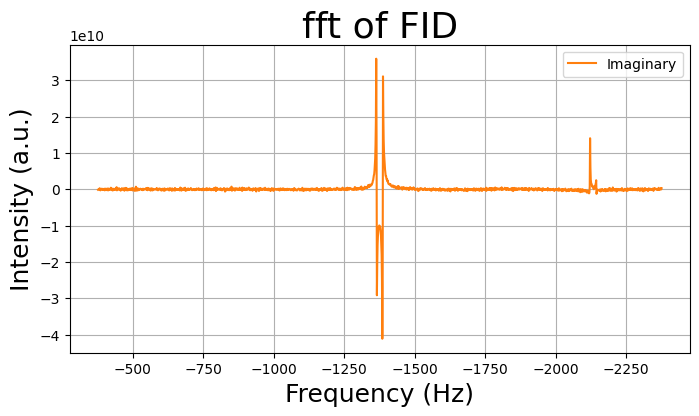

In [10]:
spectrum = nmrglue.proc_base.fft(ls_and_apodized_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
center=-(SF-SFO1)*10**6
plot_width=100
n = len(all_data.real)
freq = np.linspace(-SWH / 2+center, SWH / 2+center, n)
#I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(freq, np.imag(spectrum), label="Imaginary", color="#ff7f0e")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-1475,-1250)
plt.gca().invert_xaxis()
plt.show()

In [11]:
"""
spectrum = nmrglue.proc_base.rft(ls_and_apodized_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()



spectrum = nmrglue.proc_base.rft(ls_and_apodized_data.real) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID.real", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()


spectrum = nmrglue.proc_base.rft(ls_and_apodized_data.imag) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(8, 4))
plt.plot(freq, np.real(spectrum), label="Real", color='blue')
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("rft of FID.imag", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(-2000,-650)
#plt.xlim(-1330,-1390)
plt.show()
"""

'\nspectrum = nmrglue.proc_base.rft(ls_and_apodized_data) \n#spectrum = nmrglue.proc_base.fft(all_data)\n\n# Create a frequency axis\nn = len(all_data.real)\nfreq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)\n#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.\n\nplt.figure(figsize=(8, 4))\nplt.plot(freq, np.real(spectrum), label="Real", color=\'blue\')\nplt.xlabel("Frequency (Hz)", fontsize=18)\nplt.ylabel("Intensity (a.u.)", fontsize=18)\nplt.title("rft of FID", fontsize=26)\nplt.legend()\nplt.grid(True)\n#plt.xlim(-2000,-650)\n#plt.xlim(-1330,-1390)\nplt.show()\n\n\n\nspectrum = nmrglue.proc_base.rft(ls_and_apodized_data.real) \n#spectrum = nmrglue.proc_base.fft(all_data)\n\n# Create a frequency axis\nn = len(all_data.real)\nfreq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)\n#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.\n\nplt.figure(fig